In [1]:
import pymc3 as pm
import komatsu
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 18

In [2]:
hasaki_names, hasaki = komatsu.load_data(komatsu.HASAKI_NAMES, komatsu.HASAKI)
mamouryo_names, mamouryo = komatsu.load_data(komatsu.MAMOURYO_NAMES, komatsu.MAMOURYO)
sessaku_names, sessaku = komatsu.load_data(komatsu.SESSAKU_NAMES, komatsu.SESSAKU)

In [3]:
raw_y = mamouryo[0]
raw_X = hasaki
print(raw_y.shape, raw_X.shape)

(50,) (37, 50)


In [4]:
n_features = raw_X.shape[0]

with pm.Model() as model:
    alphas = pm.HalfNormal("alphas", sd=1, shape=(n_features,))
    beta = pm.HalfNormal("beta", sd=1)
    
    w = pm.Normal("w", mu=0.0, tau=alphas, shape=(n_features,))
    mu = 0
    for i in range(n_features):
        mu += w[i] * raw_X[i] 
    print(mu.shape)
    z = pm.Normal("z", mu=mu, tau=beta, observed=raw_y)
    trace = pm.sample(2000, init="advi", n_init=1000)

Shape.0


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average Loss = 3.7032e+06: 100%|██████████| 1000/1000 [00:01<00:00, 987.83it/s]
Finished [100%]: Average Loss = 3.6789e+06
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [w, beta, alphas]
Sampling 2 chains: 100%|██████████| 5000/5000 [02:42<00:00, 25.95draws/s]
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(

In [5]:
pm.summary(trace).round(2)

/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
w__0,1.41,1.44,0.05,-0.99,4.59,813.16,1.00
w__1,-0.37,2.47,0.11,-4.49,3.31,331.94,1.00
w__2,0.19,2.13,0.09,-3.59,3.88,404.82,1.00
w__3,0.82,2.84,0.17,-3.71,6.65,231.23,1.00
w__4,0.81,5.65,0.46,-4.01,4.63,85.65,1.01
w__5,-0.05,2.27,0.11,-4.03,4.54,411.27,1.00
w__6,0.04,2.05,0.08,-4.09,3.77,570.87,1.00
w__7,0.05,2.11,0.08,-3.93,4.14,665.55,1.00
w__8,-0.03,2.10,0.07,-4.87,3.75,698.57,1.00
w__9,1.04,1.40,0.04,-1.65,3.90,956.22,1.00


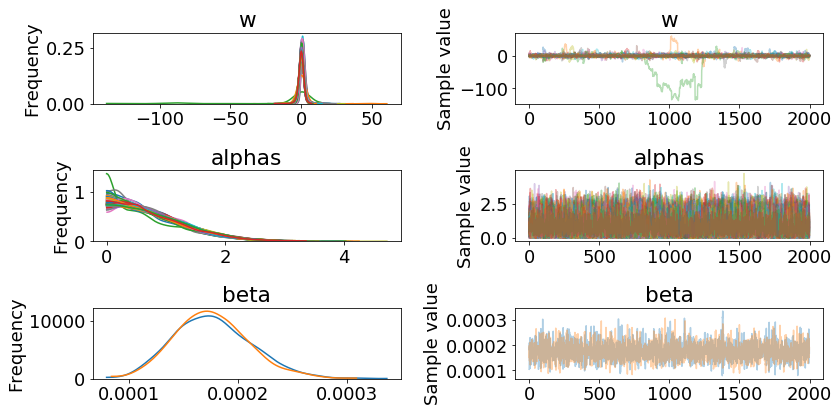

In [6]:
pm.traceplot(trace)
plt.show()

In [7]:
sample_size = trace["w"].shape
print(sample_size)

(4000, 37)


In [8]:
ppc = pm.sample_posterior_predictive(trace, samples=1000, model=model)

100%|██████████| 1000/1000 [00:01<00:00, 964.41it/s]


In [9]:
ppc_z = ppc["z"]
ppc_z.shape

(1000, 50)

In [10]:
ppc_z_mean = np.mean(ppc_z, axis=0)
ppc_z_std = np.std(ppc_z, axis=0)
print(ppc_z_mean.shape)
print(ppc_z_std.shape)

(50,)
(50,)


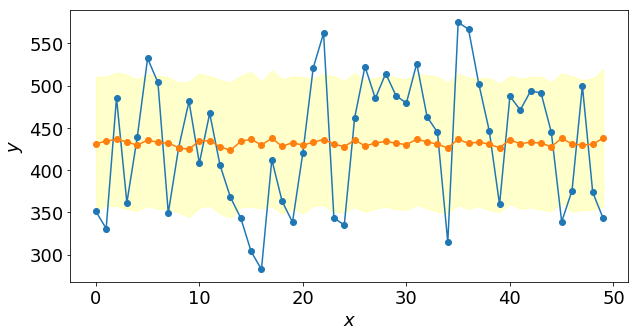

In [11]:
plt.figure(figsize=(10, 5))
xs = range(50)
plt.plot(xs, raw_y, marker="o")
plt.plot(xs, ppc_z_mean, marker="o")

plt.xlabel("$x$")
plt.ylabel("$y$")

plt.fill_between(xs, ppc_z_mean - ppc_z_std, ppc_z_mean + ppc_z_std, color='yellow', alpha=0.2)

plt.show()

In [17]:
tw= trace["w"]
print(tw.shape)

(4000, 37)


In [18]:
tw_mean = np.mean(tw, axis=0)
tw_std = np.std(tw, axis=0)
print(tw_mean.shape)
print(tw_std.shape)

(37,)
(37,)


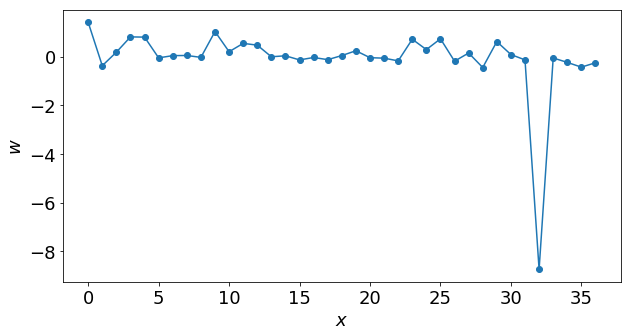

In [21]:
plt.figure(figsize=(10, 5))
xs = range(37)
plt.plot(xs, tw_mean, marker="o")

plt.xlabel("$x$")
plt.ylabel("$w$")

# plt.fill_between(xs, tw_mean - tw_std, tw_mean + tw_std, color='yellow', alpha=0.2)

plt.show()

In [22]:
for i, v in enumerate(tw_mean):
    print("{:0>2}: {}".format(i, v))

00: 1.413226812354307
01: -0.3688707423684773
02: 0.18658377357533834
03: 0.815426750910282
04: 0.8061633225602246
05: -0.04676081332076032
06: 0.04484006204977917
07: 0.05119298810688589
08: -0.026440260669910894
09: 1.036191192386261
10: 0.20567048238751245
11: 0.5494080114666924
12: 0.4754805642709207
13: -0.0015495109805973356
14: 0.038665304029745426
15: -0.1313403190449661
16: -0.03119099135049854
17: -0.12064778404461082
18: 0.04823474805349344
19: 0.24536839921711906
20: -0.03971345980831777
21: -0.05919554564762226
22: -0.17073962481460897
23: 0.7189098635655551
24: 0.29310394223072805
25: 0.7371128583342121
26: -0.1841279647835225
27: 0.15327448842555277
28: -0.4433430098080366
29: 0.6218391770153147
30: 0.08962771649163002
31: -0.12979170217603078
32: -8.745720577497703
33: -0.05134369129017439
34: -0.23272924414182383
35: -0.4285298632577788
36: -0.24773079792121294
